In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results
from omegaconf import OmegaConf
from main import load_data
from model import AEDist
import numpy as np
import os
import glob
import torch

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
sweep_id = '9qr8zqxg'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [3]:
run_id = 'rw7xfrhb'

In [4]:
run = [run for run in sweep.runs if run.id == run_id][0]

In [5]:
cfg = OmegaConf.create(run.config)
folder_path = "../src/wandb/"
folder_list = glob.glob(f"{folder_path}*{run.id}*")
ckpt_files = glob.glob(f"{folder_list[0]}/files/*.ckpt")
ckpt_path = ckpt_files[0]
data_path = os.path.join(cfg.data.root, cfg.data.name + cfg.data.filetype)
data = np.load(data_path, allow_pickle=True)
# model = AEDist(dim=50, emb_dim=10)
# model.load_from_checkpoint(ckpt_path)
model = AEDist.load_from_checkpoint(ckpt_path)
model.eval()
x_all = torch.tensor(data['data'], dtype=torch.float32)
x_pred, z_pred = model(x_all)
x_pred = x_pred.detach().cpu().numpy()
z_pred = z_pred.detach().cpu().numpy()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:281: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('mean', torch.tensor(mean, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:282: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(std, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'activation_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore t

In [6]:
data['data'].std(axis=0)

array([6.65999616, 5.73294976, 4.59004246, 3.18529688, 2.91988332,
       2.65122039, 2.37732788, 2.33619531, 2.2543231 , 2.24132405,
       2.15586233, 2.03056822, 1.87066586, 1.85172278, 1.80085911,
       1.71245522, 1.62535083, 1.55598503, 1.46987163, 1.41903988,
       1.39773157, 1.34008461, 1.2987166 , 1.25618212, 1.24092391,
       1.21640795, 1.19256312, 1.1486123 , 1.14160293, 1.11291159,
       1.07315874, 1.05100389, 1.04898935, 1.04015624, 1.0177217 ,
       1.01018892, 0.99261759, 0.98884843, 0.96968658, 0.95903168,
       0.94762704, 0.92910163, 0.91390725, 0.90879184, 0.89941009,
       0.89049115, 0.88392401, 0.87141364, 0.86297165, 0.85402506,
       0.843001  , 0.84131471, 0.8331444 , 0.82879836, 0.82356402,
       0.81654656, 0.81456782, 0.81022393, 0.80368063, 0.79427893,
       0.79085781, 0.78744398, 0.7845977 , 0.7824177 , 0.77350608,
       0.77111603, 0.76476348, 0.76197929, 0.76107871, 0.75922812,
       0.75720593, 0.75267849, 0.75230841, 0.74930547, 0.74151

In [7]:
np.savez('../dm_data/sea_ad_all_new_2.npz', data=z_pred, train_mask=data['is_train'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

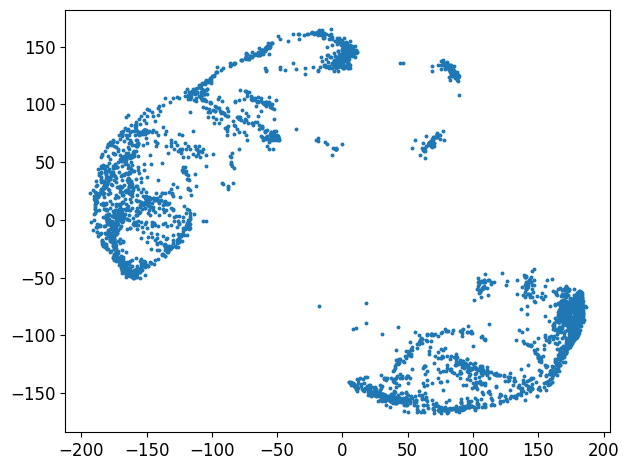

In [8]:
scprep.plot.scatter2d(z_pred)

In [9]:
data.files

['data', 'phate', 'dist', 'colors', 'is_train']

In [10]:
from scipy.spatial.distance import pdist, squareform

In [11]:
distpred = squareform(pdist(z_pred))

In [12]:
distpred

array([[  0.        , 144.73253753, 140.23926304, ..., 298.90970106,
        258.30721768, 226.19072128],
       [144.73253753,   0.        ,  13.46145747, ..., 334.41778173,
        285.75287495, 188.97979266],
       [140.23926304,  13.46145747,   0.        , ..., 343.45268564,
        294.97422919, 200.98560434],
       ...,
       [298.90970106, 334.41778173, 343.45268564, ...,   0.        ,
         48.93609022, 171.6449758 ],
       [258.30721768, 285.75287495, 294.97422919, ...,  48.93609022,
          0.        , 125.85146298],
       [226.19072128, 188.97979266, 200.98560434, ..., 171.6449758 ,
        125.85146298,   0.        ]])

In [13]:
disttrue = data['dist']

In [14]:
disttrue

array([[  0.        , 154.48850378, 146.24750569, ..., 280.42653318,
        260.48310905, 215.62482804],
       [154.48850378,   0.        ,  24.43887651, ..., 312.04844101,
        293.77590204, 254.20699534],
       [146.24750569,  24.43887651,   0.        , ..., 316.4417705 ,
        299.08025457, 261.05909372],
       ...,
       [280.42653318, 312.04844101, 316.4417705 , ...,   0.        ,
         78.40329479, 217.22535675],
       [260.48310905, 293.77590204, 299.08025457, ...,  78.40329479,
          0.        , 186.14091448],
       [215.62482804, 254.20699534, 261.05909372, ..., 217.22535675,
        186.14091448,   0.        ]])

In [15]:
z_pred2 = model.encode(x_all)

In [16]:
z_pred2

tensor([[  47.8621, -157.9247],
        [ 174.7160,  -88.2427],
        [ 176.2981, -101.6108],
        ...,
        [-100.6914,  101.4571],
        [ -57.8836,   77.7456],
        [  67.5426,   67.4083]], grad_fn=<AddmmBackward0>)

In [17]:
z_pred

array([[  47.862064, -157.92465 ],
       [ 174.71603 ,  -88.242676],
       [ 176.29807 , -101.61085 ],
       ...,
       [-100.691414,  101.45706 ],
       [ -57.883614,   77.745605],
       [  67.54258 ,   67.40826 ]], dtype=float32)

In [18]:
model.std

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [19]:
x_pred

array([[-4.34912157e+00, -3.25786185e+00,  1.07527046e+01, ...,
        -1.05232432e-01,  1.76341951e-01, -7.21902102e-02],
       [-9.22443867e+00, -1.48800385e+00, -4.81040573e+00, ...,
        -5.42410798e-02, -5.34384921e-02,  1.83640514e-03],
       [-8.98733425e+00, -9.81525064e-01, -4.15126133e+00, ...,
        -7.12650269e-02, -1.59318551e-01,  6.73161671e-02],
       ...,
       [ 6.73740387e+00, -5.05149364e-01,  7.59476244e-01, ...,
        -1.73503160e-02, -2.10994035e-01,  5.85933104e-02],
       [ 7.83327818e+00,  2.42098883e-01,  3.26173872e-01, ...,
        -8.38272972e-05, -1.02630675e-01,  1.43352197e-02],
       [-3.73930430e+00,  6.94399297e-01, -4.43442249e+00, ...,
         2.82567628e-02, -2.61664558e-02, -1.21374335e-03]], dtype=float32)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

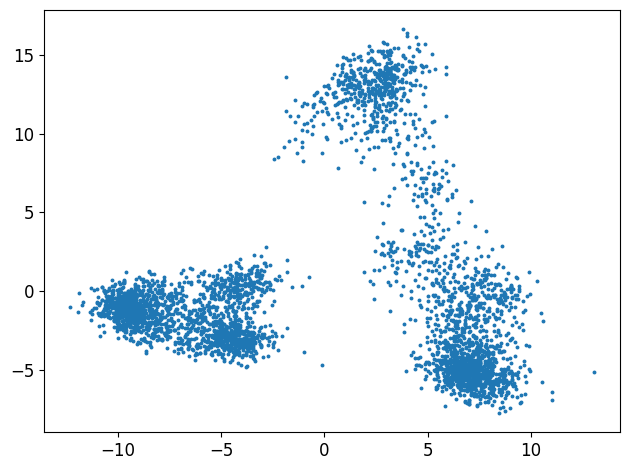

In [20]:
scprep.plot.scatter2d(data['data'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

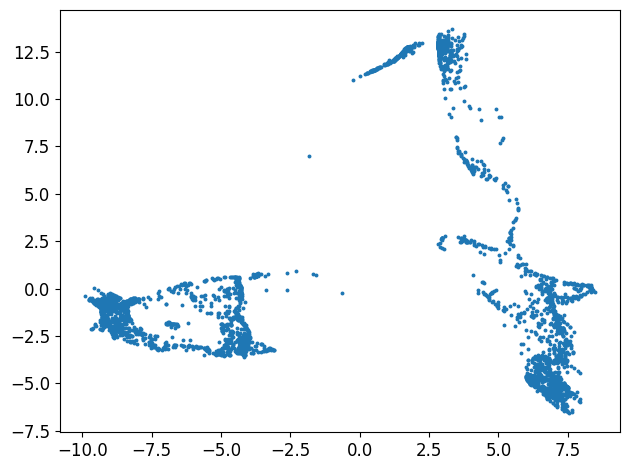

In [21]:
scprep.plot.scatter2d(x_pred)

In [22]:
trainloader, valloader, X, phate_coords, colors, dist, pp, mean, std = load_data(cfg, load_all=False)

In [23]:
X

array([[-10.46617721,  -0.95093263,  -5.2972538 , ...,  -0.16828052,
         -0.35368801,  -0.0993046 ],
       [ -7.37856994,  -2.23530496,  -3.65967924, ...,   0.11808633,
         -0.30824108,   1.97837889],
       [  7.00164642,  -5.94825703,  -1.99004338, ...,  -0.08539368,
          0.50895143,   0.19518583],
       ...,
       [  7.19824663,  -3.35571747,  -1.24761792, ...,   0.21685389,
         -0.68819915,   0.56238553],
       [  8.63828552,   1.5362315 ,   0.49099461, ...,   0.20677386,
         -0.83919563,  -0.1976006 ],
       [ -4.05364096,   1.48017214,  -4.77429341, ...,  -0.50300701,
          0.31974488,  -0.38377685]])

In [24]:
data['data']

array([[ -4.29178192,  -2.61579511,  11.55192702, ...,  -0.38976693,
         -0.57641231,  -0.51882825],
       [-10.46617721,  -0.95093263,  -5.2972538 , ...,  -0.16828052,
         -0.35368801,  -0.0993046 ],
       [ -7.37856994,  -2.23530496,  -3.65967924, ...,   0.11808633,
         -0.30824108,   1.97837889],
       ...,
       [  7.11025589,   0.8637902 ,   2.09746328, ...,   0.05903687,
          0.61823007,   0.42162645],
       [  8.63828552,   1.5362315 ,   0.49099461, ...,   0.20677386,
         -0.83919563,  -0.1976006 ],
       [ -4.05364096,   1.48017214,  -4.77429341, ...,  -0.50300701,
          0.31974488,  -0.38377685]])

In [25]:
data['data'][data['is_train']]

array([[-10.46617721,  -0.95093263,  -5.2972538 , ...,  -0.16828052,
         -0.35368801,  -0.0993046 ],
       [ -7.37856994,  -2.23530496,  -3.65967924, ...,   0.11808633,
         -0.30824108,   1.97837889],
       [  7.00164642,  -5.94825703,  -1.99004338, ...,  -0.08539368,
          0.50895143,   0.19518583],
       ...,
       [  7.19824663,  -3.35571747,  -1.24761792, ...,   0.21685389,
         -0.68819915,   0.56238553],
       [  8.63828552,   1.5362315 ,   0.49099461, ...,   0.20677386,
         -0.83919563,  -0.1976006 ],
       [ -4.05364096,   1.48017214,  -4.77429341, ...,  -0.50300701,
          0.31974488,  -0.38377685]])